# Opsin spectra
#### v1.1 | by Katrin Franke

This script calculates opsin spectra as described in [Stockman and Sharpe (2000)](https://www.sciencedirect.com/science/article/pii/S0042698900000213).

In [5]:
import os
import math
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Helper(s)
#
import scripts.spectrum as spc

# Set graphics to be plotted in the notebook
#
%matplotlib inline 

# Seaborn plot settings
#
sns.set()

# General definition(s)
#
txtFileNewLineStr = "\r\n"

def setPlotStyle():
    # Presettings for figures
    #
    mpl.rcParams['figure.figsize'] = [10, 5]
    mpl.rc('font', size=10)          
    mpl.rc('axes', titlesize=12)    
    mpl.rc('axes', labelsize=12)    
    mpl.rc('xtick', labelsize=12)   
    mpl.rc('ytick', labelsize=12)   
    mpl.rc('legend', fontsize=12)   
    mpl.rc('figure', titlesize=12) 

In [6]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Generate array with wavelengths in the relevant range:

In [7]:
start_nm    = 300
end_nm      = 700
wavelengths = np.arange(start_nm, end_nm, 1)

## Generate template

Following Eq. 8 in [Stockman and Sharpe (2000)](https://www.sciencedirect.com/science/article/pii/S0042698900000213):


$log_{10}[t_{OD}(x)] = a + b x^2 + c x^4 + d x^6 + e x^8 + f x^{10} + g x^{12} + h x^{14}$

with $x = log_{10}(\lambda)$ and wavelength $\lambda$ in $[nm]$, and parameters $a$ to $h$ as defined below.

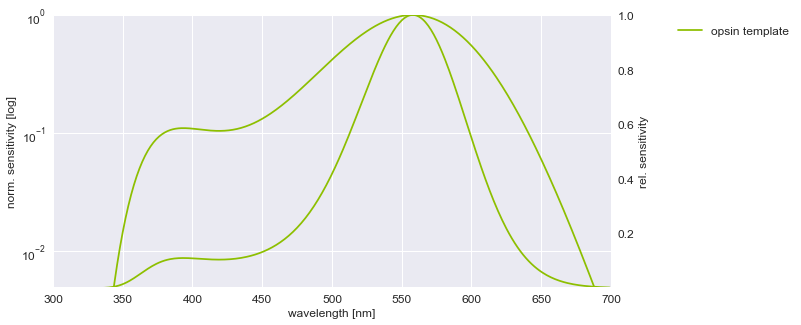

In [37]:
def eq8(x):
    # Define constants
    #
    a = -188862.970810906644
    b = 90228.966712600282
    c = -2483.531554344362
    d = -6675.007923501414
    e = 1813.525992411163
    f = -215.177888526334
    g = 12.487558618387
    h = -0.289541500599
    return 10**(a + b*x**2 + c*x**4 + d*x**6 + e*x**8 + f*x**10 + g*x**12 + h*x**14)

# Calculate x 
#
x = np.log10(wavelengths)

# Generate opsin spectrum Atemplate
#
temp = []
for i in range(end_nm -start_nm):
    value = eq8(x[i])
    temp.append(value)
spect_template = np.array(temp)    
    
# Find wavelength at peak
#
peak    = max(temp)
peak_nm = temp.index(peak) +start_nm
spect_template = np.array(temp)    
  
# Plot template
#
setPlotStyle()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
col = spc.wavelength_to_rgb(peak_nm, darker=0.75)
ax1.semilogy(wavelengths, spect_template, color=col, label="opsin template")
ax1.set_xlabel("wavelength [nm]")        
ax1.set_ylabel("norm. sensitivity [log]")      
ax1.set_ylim((0.005, 1.0))
ax1.set_xlim((300, 700))
ax2.plot(wavelengths, spect_template, color=col, label="opsin template")
ax2.set_ylim((0.005, 1.0))
ax2.set_ylabel("rel. sensitivity")      
ax2.legend(bbox_to_anchor=(1.1, 1), loc="upper left")
ax2.grid(False)   

## Generate mouse opsin curves

S-, M- opsin as well as rhodopsin

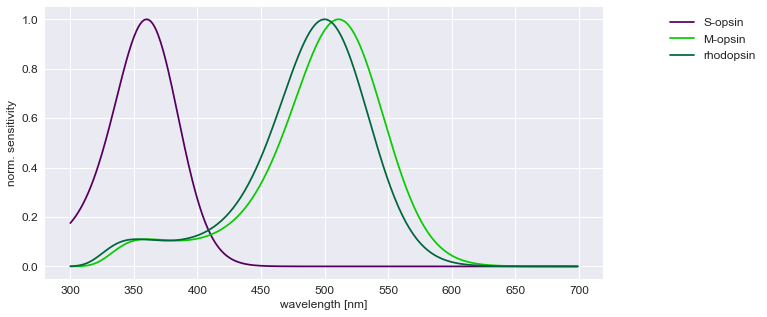

In [58]:
mouse_peak_nm = [360, 511, 500]
mouse_opsins  = ["S-opsin", "M-opsin", "rhodopsin"]
mouse_spect_x = []
mouse_spect   = []

for iP, peak in enumerate(mouse_peak_nm):
    mouse_spect_x.append(np.log10(wavelengths) -math.log10(peak /peak_nm))
    temp = []
    for i in range(end_nm -start_nm):
        temp.append(eq8(mouse_spect_x[iP][i]))
    mouse_spect.append(temp)        

# Plot spectra
#
for iP, peak in enumerate(mouse_peak_nm):
    name = mouse_opsins[iP] 
    d    = 0.4 if name == "rhodopsin" else 0.8
    col = spc.wavelength_to_rgb(peak, darker=d)
    plt.plot(wavelengths, mouse_spect[iP], color=col, label=mouse_opsins[iP])

plt.gca().set(xlabel="wavelength [nm]", ylabel="norm. sensitivity")     
plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left")

## Generate zebrafish opsin curves

UV, S-, M-, L opsin as well as rhodopsin

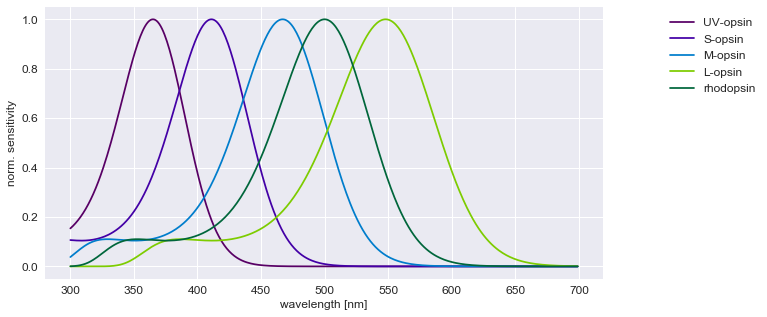

In [61]:
zebrafish_peak_nm = [365, 411, 467, 548, 500]
zebrafish_opsins  = ["UV-opsin", "S-opsin", "M-opsin", "L-opsin", "rhodopsin"]
zebrafish_spect_x = []
zebrafish_spect   = []

for iP, peak in enumerate(zebrafish_peak_nm):
    zebrafish_spect_x.append(np.log10(wavelengths) -math.log10(peak /peak_nm))
    temp = []
    for i in range(end_nm -start_nm):
        temp.append(eq8(zebrafish_spect_x[iP][i]))
    zebrafish_spect.append(temp)        

# Plot spectra
#
for iP, peak in enumerate(zebrafish_peak_nm):
    name = zebrafish_opsins[iP] 
    d    = 0.4 if name == "rhodopsin" else 0.8
    col = spc.wavelength_to_rgb(peak, darker=d)
    plt.plot(wavelengths, zebrafish_spect[iP], color=col, label=zebrafish_opsins[iP])

plt.gca().set(xlabel="wavelength [nm]", ylabel="norm. sensitivity")     
plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left")